# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "../data/project_data.csv"
per_capita_coffee_data_to_load = "../data/project_data_with_percapita_consumption.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)
per_capita_coffee_data = pd.read_csv(per_capita_coffee_data_to_load)
#coffee_data.head()

plt.rcParams["figure.figsize"] = 16,9


## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?


In [11]:
# Build out DataFrames to be used in graph
year = per_capita_coffee_data.iloc[:,1].unique()
coffee_consumption_by_ctry_per_capita = per_capita_coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]

coffee_consumption_pivot_per_capita = coffee_consumption_by_ctry_per_capita.pivot(index="Year", columns="Country Name", values="Coffee Consumed per Capita in Kg")

avg_cofee_consumption_data = coffee_consumption_pivot_per_capita.mean(axis=1)


In [12]:
#coffee_consumption_pivot_per_capita

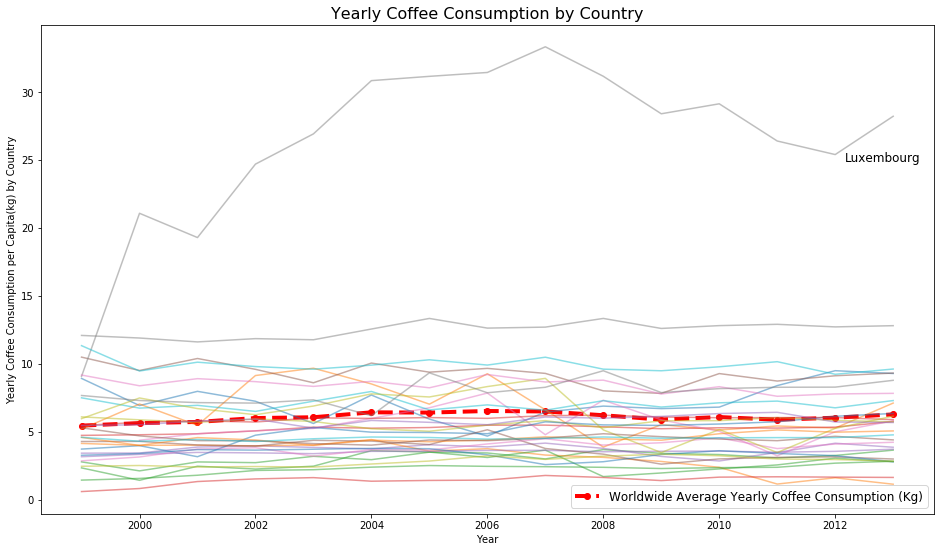

In [14]:
# Create line graph to illlustrate the combined mean coffee consumption by year graph with consumption graph by country

# Create figure with subplots
figure, ax = plt.subplots()

# Plot line for average worldwide consumption
ax.plot(year, avg_cofee_consumption_data, linewidth=4, marker="o", color = "r", linestyle = "--", label = "Worldwide Average Yearly Coffee Consumption (Kg)")

# Plot individual country lines
ax.plot(coffee_consumption_pivot_per_capita, alpha = .5)

# Add legend for avg worldwide consumption
legend1 = ax.legend(loc='lower right', fontsize='large')

# Add text to highlight outlier country
ax.text(.9, .74, "Luxembourg", transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

# Add title and x,y labels
plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
plt.ylabel("Yearly Coffee Consumption per Capita(kg) by Country")
plt.xlabel("Year")

# Print and save graph
plt.show()
#plt.savefig(coffee_consumption_per_capita)